In [5]:
%matplotlib inline
import torch
import random
from d2l import torch as d2l

In [6]:
def synthetic_data(w, b, num_examples):
    """生成y=Xw+b+噪声"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

In [7]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

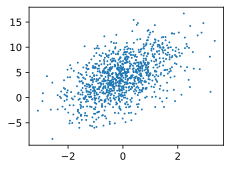

In [16]:
d2l.set_figsize()
d2l.plt.scatter(features[:,0].detach().numpy(), labels.detach().numpy(), 1)

In [17]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [18]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-2.0382, -0.0353],
        [-0.6701,  1.5963],
        [-0.1440,  1.3017],
        [ 0.4864,  0.2883],
        [ 0.7668, -1.1729],
        [-1.3746, -0.6580],
        [ 0.8469,  1.1911],
        [-0.5261, -0.4960],
        [-0.5688,  0.9402],
        [-1.8830, -1.5728]]) 
 tensor([[ 0.2311],
        [-2.5599],
        [-0.5185],
        [ 4.1836],
        [ 9.7326],
        [ 3.6871],
        [ 1.8503],
        [ 4.8511],
        [-0.1319],
        [ 5.7818]])


In [19]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [20]:
def linreg(X, w, b):  #@save
    """Linear Regression model"""
    return torch.matmul(X, w) + b

In [21]:
def squared_loss(y_hat, y):  #@save
    """Loss function"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [22]:
def sgd(params, lr, batch_size):  #@save
    
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [23]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

In [24]:
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y) 
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.041614
epoch 2, loss 0.000155
epoch 3, loss 0.000048
